# Forecasting Cryptocurrency Prices: A Comprehensive Analysis Using Daily Data

![Crypto](https://jeangalea.com/wp-content/uploads/2021/04/Tokenized-stocks-800x540.png)

## Introduction

### Predicting Cryptocurrency Prices

Cryptocurrencies have become a prominent asset class in the financial markets, characterized by their significant price fluctuations and complex behavior. Accurate prediction of cryptocurrency prices can provide substantial advantages for traders, investors, and analysts. This project focuses on forecasting the daily prices of cryptocurrencies using a dataset from Kaggle, which includes historical daily prices of various cryptocurrencies.

### Project Objectives

1. **Data Collection:** Utilize the "Cryptocurrencies Daily Prices" dataset from Kaggle, which contains daily price information for multiple cryptocurrencies. This dataset includes key features such as opening, closing, high, and low prices, as well as trading volume.
2. **Data Preprocessing:** Prepare the dataset by handling missing values, normalizing features, and creating relevant new features. This step will ensure that the data is in the optimal format for analysis and modeling.
3. **Exploratory Data Analysis (EDA):** Conduct an in-depth analysis to uncover trends, patterns, and correlations within the data. Visualization and statistical analysis will help in understanding the behavior of different cryptocurrencies over time.
4. **Model Development:** Implement and evaluate various predictive models, including time series forecasting methods (e.g., ARIMA, Prophet) and machine learning algorithms (e.g., Linear Regression, Random Forest, Gradient Boosting). The goal is to identify the most effective approach for forecasting daily cryptocurrency prices.
5. **Model Evaluation:** Assess the performance of the predictive models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This evaluation will help in selecting the best-performing model.
6. **Deployment and Analysis:** Prepare the final model for potential real-world application, and provide insights and recommendations based on the predictions. This may involve developing a simple API or integrating the model into a trading strategy.

### Scope and Goals

The scope of this project involves:
- Analyzing daily price data for a selection of cryptocurrencies from the Kaggle dataset.
- Applying data preprocessing techniques and feature engineering to enhance model performance.
- Comparing various models to determine the most accurate forecasting method.
- Presenting actionable insights and potential use cases for the model's predictions.

This notebook will guide you through the entire process, from initial data exploration to the final model evaluation, with the aim of building a robust forecasting system for cryptocurrency prices.

## Steps of the Project

### 1. **Data Collection**
   **Description:** Acquire the dataset containing historical daily prices for various cryptocurrencies. This dataset includes key features such as opening, closing, high, and low prices, as well as trading volumes. The data can be sourced from Kaggle or other financial data providers.

### 2. **Data Preprocessing**
   **Description:** Prepare the data for analysis by cleaning and transforming it. This includes handling missing values, normalizing numerical features, and encoding categorical variables. Preprocessing also involves feature engineering to create new features that may improve model performance.

### 3. **Exploratory Data Analysis (EDA)**
   **Description:** Analyze the data to understand its structure and underlying patterns. This involves visualizing price trends, calculating summary statistics, and exploring relationships between different features. EDA helps in identifying trends, anomalies, and correlations that can inform model selection.

### 4. **Feature Engineering**
   **Description:** Develop new features from the existing data to enhance model performance. This might include calculating moving averages, volatility measures, or other technical indicators relevant to cryptocurrency trading. Feature engineering aims to provide the model with additional insights into price behavior.

### 5. **Model Selection**
   **Description:** Choose and implement various predictive models suitable for time series forecasting. Models may include statistical methods like ARIMA and SARIMA, or machine learning approaches such as Linear Regression, Random Forests, and Gradient Boosting. Each model will be evaluated to determine its suitability for predicting cryptocurrency prices.

### 6. **Model Training**
   **Description:** Train the selected models on the training data. This involves fitting the models to the historical price data and optimizing their parameters. Hyperparameter tuning and cross-validation are used to improve the models’ accuracy and generalization.

### 7. **Model Evaluation**
   **Description:** Assess the performance of the trained models using the testing data. Evaluate the models based on metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). This step helps in selecting the best-performing model.

### 8. **Model Improvement**
   **Description:** Refine and enhance the model based on evaluation results. This may involve feature selection, model tuning, or trying different algorithms. The goal is to improve prediction accuracy and ensure robustness.

### 9. **Deployment**
   **Description:** Prepare the final model for real-world application. This might involve developing an API or integrating the model into a web or mobile application. Deployment also includes setting up a system for continuous monitoring and updating of the model.

## 0. Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## 1. **Data Loading and Preparation:**

In [35]:
btc_data = pd.read_csv('../Dataset/BTC.csv')
ltc_data = pd.read_csv('../Dataset/LTC.csv')
eth_data = pd.read_csv('../Dataset/ETH.csv')

In [36]:
df = pd.concat([btc_data, ltc_data, eth_data], ignore_index=True)

In [37]:
btc_df = pd.DataFrame(btc_data)
ltc_df = pd.DataFrame(ltc_data)
eth_df = pd.DataFrame(eth_data)

In [38]:
crypto_data = pd.DataFrame(df)

In [39]:
crypto_data.head(5)

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921


In [40]:
crypto_data.shape

(12361, 6)

## 2. Data Preprocessing

### 2.1 Checking for different Crypto Currencies in the dataset

In [27]:
crypto_data['ticker'].value_counts()

ticker
BTC     5135
LTC     3938
ETH     3288
ETHW    3288
Name: count, dtype: int64

So there are total 128 types of cryptocurrencies. and we should check and clean each one of them for a proper cleaned and preprocessed data.

In [28]:
crypto_data.isna().sum()

ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64

So there is 0 null or na values in the dataset.

In [29]:
crypto_data.duplicated().sum()

0

Also there is not even a single duplicated row in the dataset

In [30]:
print(crypto_data.dtypes)

ticker     object
date       object
open      float64
high      float64
low       float64
close     float64
dtype: object


### 2.2 Let's first explore the Bitcoin dataset

In [41]:
btc_df

,ticker,date,open,high,low,close
0,BTC,2010-07-17,0.04951,0.04951,0.04951,0.04951
1,BTC,2010-07-18,0.04951,0.08585,0.04951,0.08584
2,BTC,2010-07-19,0.08584,0.09307,0.07723,0.08080
3,BTC,2010-07-20,0.08080,0.08181,0.07426,0.07474
4,BTC,2010-07-21,0.07474,0.07921,0.06634,0.07921
...,...,...,...,...,...,...
5130,BTC,2024-08-02,64835.80000,65558.90000,61234.40000,61915.70000
5131,BTC,2024-08-03,61922.70000,62177.00000,59843.10000,60605.30000
5132,BTC,2024-08-04,60609.80000,61075.20000,57164.50000,58443.00000
5133,BTC,2024-08-05,58443.00000,59100.90000,48999.50000,54375.70000


**Let's explore the correlation map of the BTC dataset first.**

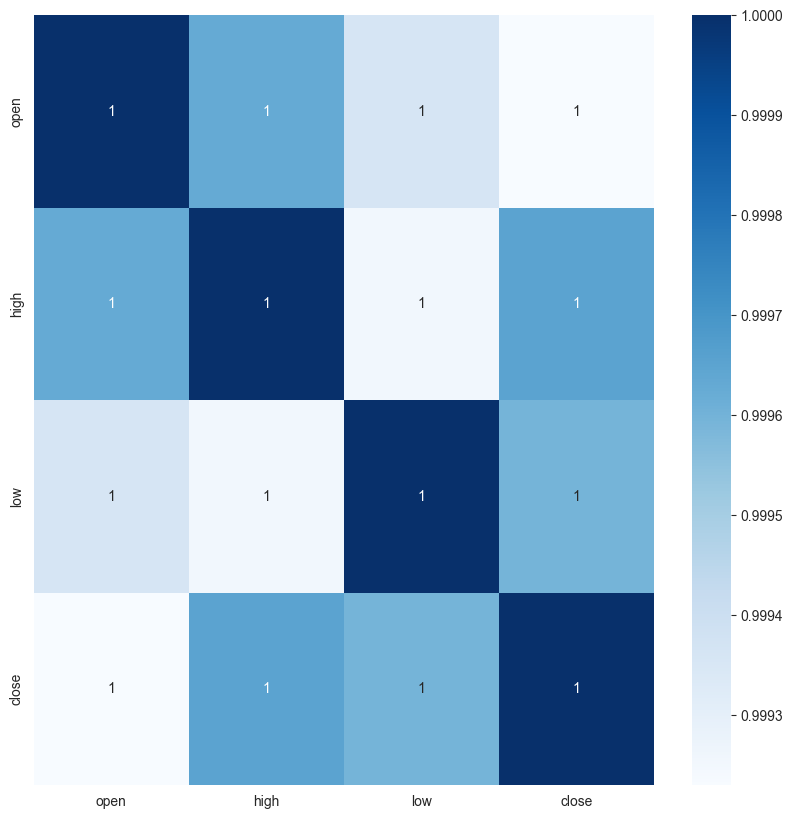

In [45]:
btc_corr = btc_df.corr(numeric_only=True)

plt.figure(figsize=(10,10))
sns.heatmap(btc_corr, annot=True, cmap='Blues')
plt.show()

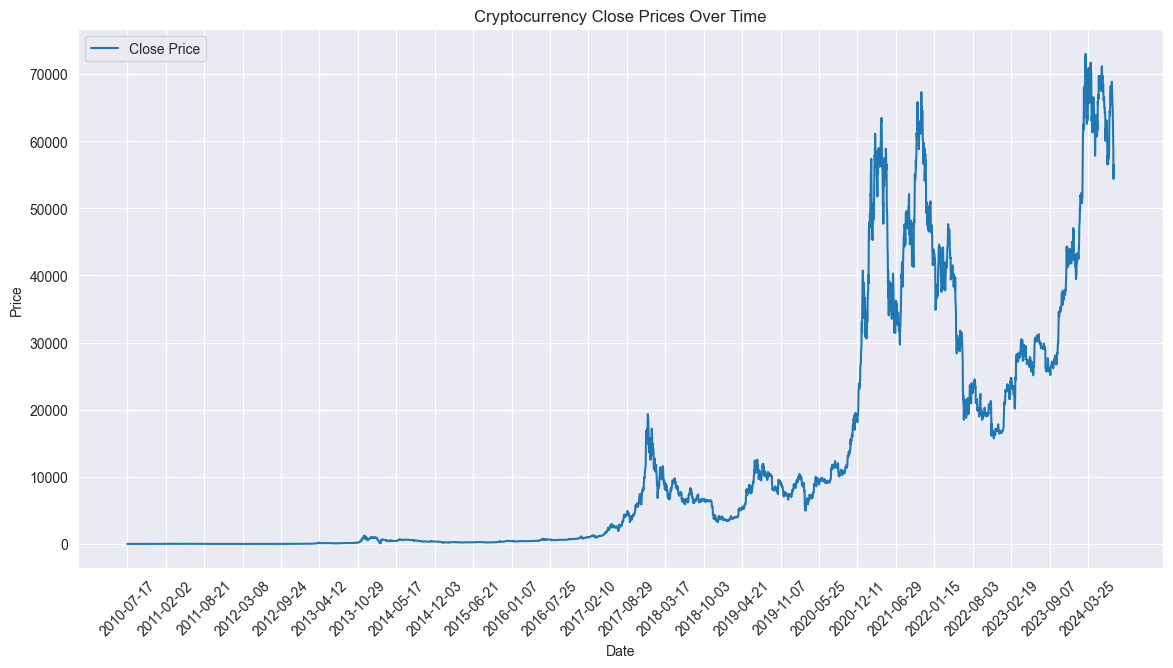

In [49]:
plt.figure(figsize=(14, 7))
plt.plot(btc_df['date'], btc_df['close'], label='Close Price')
plt.xticks(ticks=btc_df['date'][::200], rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Cryptocurrency Close Prices Over Time')
plt.legend()
plt.show()